In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, SVC, NuSVC
from sklearn.preprocessing import scale
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, r2_score, balanced_accuracy_score, average_precision_score
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ShuffleSplit, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_classification
from tpot import TPOTClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [11]:

rw = pd.read_csv("data/winequality-red.csv", sep=";")
ww = pd.read_csv("data/winequality-white.csv", sep=";")

#rw = pd.read_csv("data/red-normalized.csv", sep=",")
#ww = pd.read_csv("data/white-normalized.csv", sep=",")
colors = ['r', 'y']

In [12]:
rw.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [13]:
ww.head()
rw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

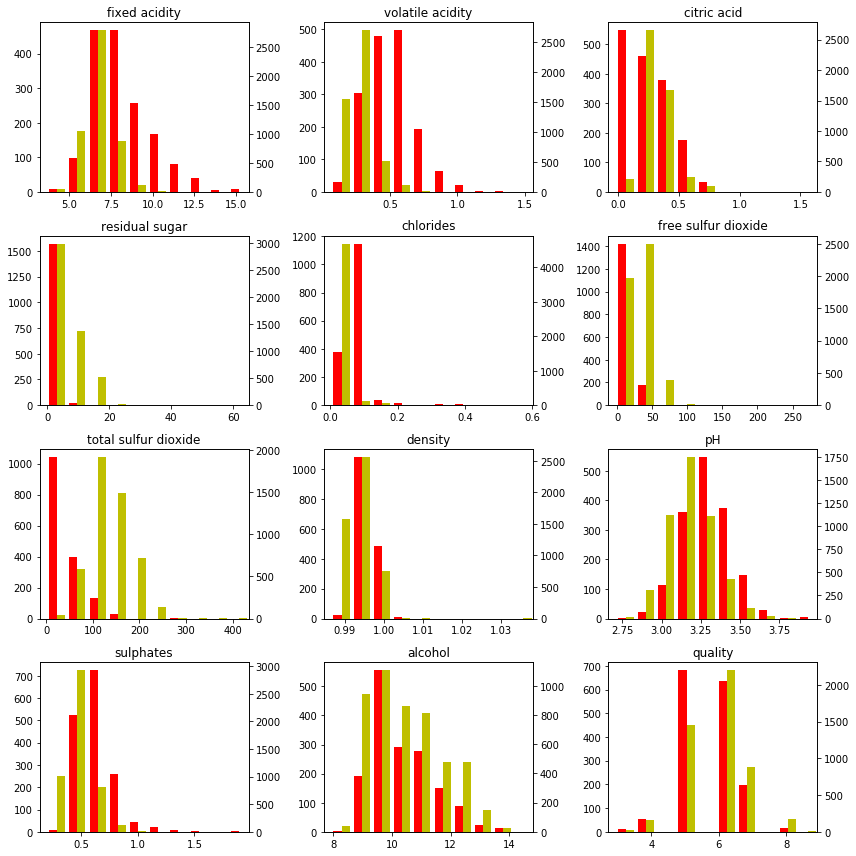

In [16]:
figure = plt.figure(figsize=(12, 12))
i=1
for col in rw.columns:
    plot_histogram(col,i)
    i+=1

plt.tight_layout()
plt.show()
figure.savefig("histomatrix.png")


In [15]:
def plot_histogram(col, i):
    #print(col)
    ax1 = plt.subplot(4,3,i)
    ax2 = ax1.twinx()
    ax1.hist([rw[col], ww[col]], color=colors)
    n, bins, patches = ax1.hist([rw[col],ww[col]])
    ax1.cla() #clear the axis

    #plots the histogram data
    width = (bins[1] - bins[0]) * 0.4
    bins_shifted = bins + width
    ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
    ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

    #finishes the plot
    #ax1.set_ylabel("red count", color=colors[0])
    #ax2.set_ylabel("white count", color=colors[1])
    #ax1.tick_params('y', colors=colors[0])
    #ax2.tick_params('y', colors=colors[1])
    
    ax1.set_title(col)

In [25]:
def plot_histogram(col):
    #print(col)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist([rw[col], ww[col]], color=colors)
    n, bins, patches = ax1.hist([rw[col],ww[col]])
    ax1.cla() #clear the axis

    #plots the histogram data
    width = (bins[1] - bins[0]) * 0.4
    bins_shifted = bins + width
    ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
    ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

    #finishes the plot
    ax1.set_ylabel("count", color=colors[0])
    ax2.set_ylabel("count", color=colors[1])
    ax1.tick_params('y', colors=colors[0])
    ax2.tick_params('y', colors=colors[1])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [44]:
#data = ww.append(rw)
data = ww

data[data.columns[0:12]].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [45]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = StandardScaler().fit_transform(data[column_names])

label_names = 'quality'
#label_data = data[label_names]/100

#Best random state for white is 27, red is 43
X_train, X_test, y_train, y_test = train_test_split(X, np.array(data[label_names]), test_size=0.2, random_state=27)

#Make sure y_true contains classes in y_pred
np.unique(y_train)==np.unique(y_test)

array([ True,  True,  True,  True,  True,  True,  True])

In [46]:
np.unique(y_train)

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [24]:
X_train

array([[ 0.21852997, -1.21684919,  0.97064898, ...,  0.3167512 ,
         0.60105502, -0.30317536],
       [-0.24109439,  0.73841761, -1.39147228, ...,  0.77030067,
        -0.46118037, -0.86637886],
       [ 1.48249695,  0.01217565,  1.12470036, ..., -1.56223945,
        -0.57920652,  1.19870062],
       ...,
       [-0.41345352,  0.06804042, -0.72391627, ...,  0.51112954,
        -0.28414114, -0.96024611],
       [ 1.65485608,  0.73841761, -0.15906119, ..., -1.62703223,
         0.36500271,  0.54162988],
       [ 0.67815432, -0.76993107,  0.71389667, ..., -0.13679827,
         0.8961204 ,  0.44776263]])

In [25]:
label = [3, 4, 5, 6, 7, 8, 9]
dummies = data['quality'].astype('category', categories=label)
dummies = pd.get_dummies(dummies, prefix='quality', prefix_sep='_')
data_sm = pd.concat([data, dummies], axis=1)
onehot_names = []
for i in label:
    onehot_names.append('quality_' + str(i))

ValueError: Got an unexpected argument: categories

In [26]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(data_sm[column_names], data_sm[onehot_names], test_size=0.2, random_state=20)
y_train_sm.head()

NameError: name 'data_sm' is not defined

In [ ]:
multi_target_forest = MultiOutputClassifier(clf7a, n_jobs=-1)
multi_target_forest.fit(X_train_sm, y_train_sm).predict(X_test_sm)

In [12]:
#print("multi_target_forest       {0}".format(accuracy_score(y_test_sm, multi_target_forest.predict(X_test_sm))))


#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [98]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

In [19]:
#ytrue = y_test
#ypred = classifier.predict_proba(X_test)
def top_2_categorical_accuracy(ytrue, ypred):
    
    numpredictions = ypred.shape[0]
    sortedindex = []
    for n in range(numpredictions):
        sortedindex.append(np.argsort(ypred[n])[::-1])
        
    sortedindex = np.stack(sortedindex)+np.min(ytrue)
    y = np.asmatrix(ytrue).T

    count=0
    print_counter = 0
    for n in range(numpredictions):
        print_counter += 1
        if (print == True and print_counter == 5):
            print(", ".join(map(str, y[n][0])) + " : " + ", ".join(map(str, sortedindex[n])))
            print_counter = 0
            
        if (y[n]==sortedindex[n][0] or y[n]==sortedindex[n][1]):
            count += 1
    
    return count/numpredictions

#print("TPOT                   {0}".format(top_2_categorical_accuracy(y_test, tpot.predict_proba(X_test))))


In [17]:
clf1a = DecisionTreeClassifier(max_depth=300)
clf2a = KNeighborsClassifier(n_neighbors=200)
clf3a = SVC(gamma='scale', kernel='poly', degree=4, probability=True)
clf4a = LogisticRegression(random_state=1, solver='newton-cg', multi_class='multinomial')
clf5a = XGBClassifier()
clf6a = ExtraTreesClassifier(n_estimators=2000)
clf7a = GradientBoostingClassifier(n_estimators=2000, max_leaf_nodes=500, max_depth=None, random_state=2, min_samples_split=5)
clf8a = MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=1000000)
eclf = VotingClassifier(estimators=[ ('dt', clf1a), ('knn', clf2a), ('svc', clf3a), ('lr', clf4a), ('xgb', clf5a), ('etc', clf6a), ('gbc', clf7a), ('mlp', clf8a)],  voting='soft', weights=[1, 1, 1, 1, 1, 1, 1, 1])
#tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))


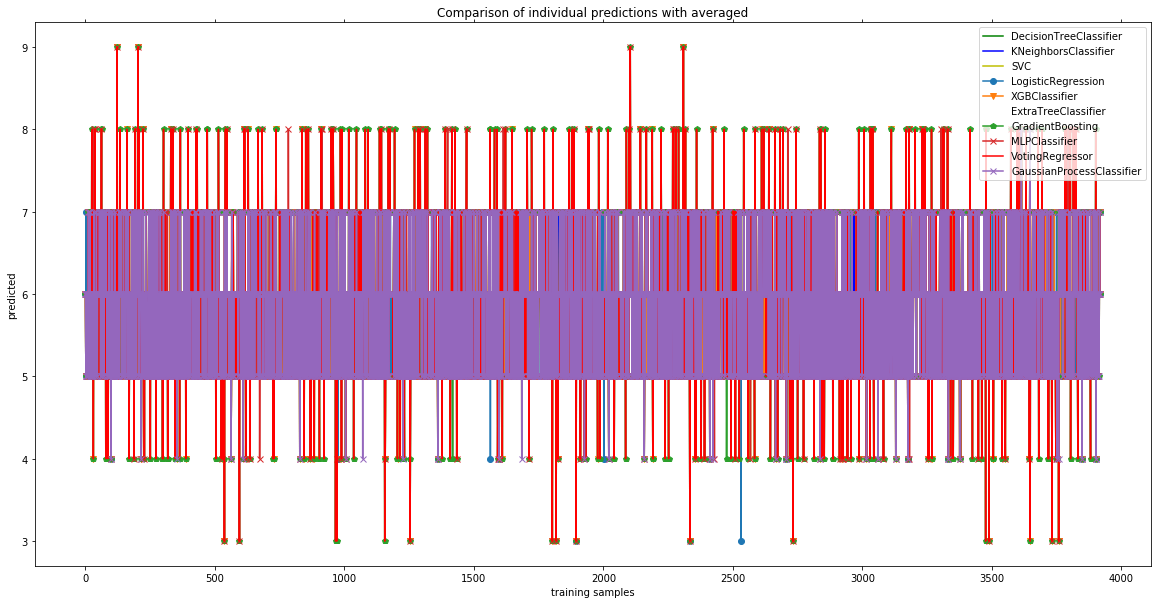


Accuracy Score
DecisionTreeClassifier 0.6244897959183674
KNeighborsClassifier   0.5663265306122449
SVC                    0.5448979591836735
LogisticRegression     0.55
XGBClassifier          0.5969387755102041
ExtraTreesClassifier   0.7183673469387755
GradientBoosting       0.6816326530612244
MLPClassifier          0.5887755102040816
VotingClassifier       0.7071428571428572
GaussianProcess        0.6438775510204081

Balance Accuracy Score
DecisionTreeClassifier 0.43252879259296567
KNeighborsClassifier   0.22211301891920637
SVC                    0.21452504513828205
LogisticRegression     0.23082666432074986
XGBClassifier          0.2851997588248247
ExtraTreesClassifier   0.4204954917693771
GradientBoosting       0.40354174894594413
MLPClassifier          0.30217551880546945
VotingClassifier       0.40359450466222174
GaussianProcess        0.2902731198636567


In [44]:

clf1a.fit(X_train, y_train)
clf2a.fit(X_train, y_train)
clf3a.fit(X_train, y_train)
clf4a.fit(X_train, y_train)
clf5a.fit(X_train, y_train)
clf6a.fit(X_train, y_train)
clf7a.fit(X_train, y_train)
clf8a.fit(X_train, y_train)
eclf.fit(X_train, y_train)
#tpot.fit(X_train, y_train)
gpc.fit(X_train, y_train)

xt = X_train[:]

plt.figure(figsize=(20, 10))
plt.plot(clf1a.predict(xt), 'g-', label='DecisionTreeClassifier')
plt.plot(clf2a.predict(xt), 'b-', label='KNeighborsClassifier')
plt.plot(clf3a.predict(xt), 'y-', label='SVC')
plt.plot(clf4a.predict(xt), 'o-', label='LogisticRegression')
plt.plot(clf5a.predict(xt), 'v-', label='XGBClassifier')
plt.plot(clf6a.predict(xt), 'w-', label='ExtraTreeClassifier')
plt.plot(clf7a.predict(xt), 'p-', label='GradientBoosting')
plt.plot(clf8a.predict(xt), 'x-', label='MLPClassifier')
plt.plot(eclf.predict(xt), 'r-', label='VotingRegressor')
#plt.plot(tpot.predict(xt), 'h-', label='TPOT')
plt.plot(gpc.predict(xt), 'x-', label='GaussianProcessClassifier')

plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

print("\nAccuracy Score")
print("DecisionTreeClassifier {0}".format(accuracy_score(y_test, clf1a.predict(X_test))))
print("KNeighborsClassifier   {0}".format(accuracy_score(y_test, clf2a.predict(X_test))))
print("SVC                    {0}".format(accuracy_score(y_test, clf3a.predict(X_test))))
print("LogisticRegression     {0}".format(accuracy_score(y_test, clf4a.predict(X_test))))
print("XGBClassifier          {0}".format(accuracy_score(y_test, clf5a.predict(X_test))))
print("ExtraTreesClassifier   {0}".format(accuracy_score(y_test, clf6a.predict(X_test))))
print("GradientBoosting       {0}".format(accuracy_score(y_test, clf7a.predict(X_test))))
print("MLPClassifier          {0}".format(accuracy_score(y_test, clf8a.predict(X_test))))
print("VotingClassifier       {0}".format(accuracy_score(y_test, eclf.predict(X_test))))
#print("TPOT                   {0}".format(accuracy_score(y_test, tpot.predict(X_test))))
print("GaussianProcess        {0}".format(accuracy_score(y_test, gpc.predict(X_test))))
print("\nTop2 Categorical Accuracy")
print("DecisionTreeClassifier {0}".format(top2_categorical_accuracy(y_test, clf1a.predict_proba(X_test))))
print("KNeighborsClassifier   {0}".format(top2_categorical_accuracy(y_test, clf2a.predict_proba(X_test))))
print("SVC                    {0}".format(top2_categorical_accuracy(y_test, clf3a.predict_proba(X_test))))
print("LogisticRegression     {0}".format(top2_categorical_accuracy(y_test, clf4a.predict_proba(X_test))))
print("XGBClassifier          {0}".format(top2_categorical_accuracy(y_test, clf5a.predict_proba(X_test))))
print("ExtraTreesClassifier   {0}".format(top2_categorical_accuracy(y_test, clf6a.predict_proba(X_test))))
print("GradientBoosting       {0}".format(top2_categorical_accuracy(y_test, clf7a.predict_proba(X_test))))
print("MLPClassifier          {0}".format(top2_categorical_accuracy(y_test, clf8a.predict_proba(X_test))))
print("VotingClassifier       {0}".format(top2_categorical_accuracy(y_test, eclf.predict_proba(X_test))))
#print("TPOT                   {0}".format(top2_categorical_accuracy(y_test, tpot.predict_proba(X_test))))
print("GaussianProcess        {0}".format(top2_categorical_accuracy(y_test, gpc.predict_proba(X_test))))



In [59]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print("\nTop2 Accuracy")
print("TPOT                   {0}".format(top_2_categorical_accuracy(y_test, tpot.predict_proba(X_test))))



Top2 Accuracy
TPOT                   0.9173469387755102


In [ ]:
xt = X_train[:]
plt.figure(figsize=(20, 10))
plt.plot(tpot.predict(xt), 'h-', label='TPOT')

plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [86]:
for clf, label in zip([clf1a, clf2a, clf3a, clf4a, clf5a, clf6a, clf7a, clf8a, eclf], ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression', 'XGBClassifier', 'ExtraTreesClassifier', 'GradientBoosting', 'MLPClassifier', 'VotingClassifier']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

In [58]:
tpot.export()

'import numpy as np\nimport pandas as pd\nfrom sklearn.ensemble import ExtraTreesClassifier\nfrom sklearn.model_selection import train_test_split\nfrom tpot.export_utils import set_param_recursive\n\n# NOTE: Make sure that the outcome column is labeled \'target\' in the data file\ntpot_data = pd.read_csv(\'PATH/TO/DATA/FILE\', sep=\'COLUMN_SEPARATOR\', dtype=np.float64)\nfeatures = tpot_data.drop(\'target\', axis=1)\ntraining_features, testing_features, training_target, testing_target = \\\n            train_test_split(features, tpot_data[\'target\'], random_state=42)\n\n# Average CV score on the training set was: 0.6656577787914836\nexported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.5, min_samples_leaf=1, min_samples_split=7, n_estimators=100)\n# Fix random state for all the steps in exported pipeline\nset_param_recursive(exported_pipeline.steps, \'random_state\', 42)\n\nexported_pipeline.fit(training_features, training_target)\nresults = exp

In [18]:
def topk(classifier):
    predictions = classifier.predict_proba(X_test)
    numpredictions = predictions.shape[0]
    sortedindex = []
    for n in range(numpredictions):
        sortedindex.append(np.argsort(predictions[n])[::-1])
    sortedindex = np.stack(sortedindex)+3
    y = np.asmatrix(y_test).T

    count=0
    for n in range(numpredictions):
        #if (y[n]==sortedindex[n][0] or y[n]==sortedindex[n][1] or y[n]==sortedindex[n][2] or y[n]==sortedindex[n][3] or y[n]==sortedindex[n][4] or y[n]==sortedindex[n][5]):
        if (y[n]==sortedindex[n][0] or y[n]==sortedindex[n][1]):
            count += 1
    
    return count/numpredictions


In [78]:
for clf, label in zip([clf1a, clf2a, clf3a, clf4a, clf5a, clf6a, clf7a, clf8a, eclf, gpc, tpot], ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression', 'XGBClassifier', 'ExtraTreesClassifier', 'GradientBoosting', 'MLPClassifier', 'VotingClassifier', 'GaussianProcessClassifier', 'TPOT']):
    accuracy = top_2_categorical_accuracy(y_test, clf.predict_proba(X_test))
    print("Top2 Accuracy: {0} - {1}".format(accuracy, label))


Top2 Accuracy: 0.6255102040816326 - DecisionTreeClassifier
Top2 Accuracy: 0.8489795918367347 - KNeighborsClassifier
Top2 Accuracy: 0.8295918367346938 - SVC
Top2 Accuracy: 0.8571428571428571 - LogisticRegression
Top2 Accuracy: 0.8693877551020408 - XGBClassifier
Top2 Accuracy: 0.9153061224489796 - ExtraTreesClassifier
Top2 Accuracy: 0.8948979591836734 - GradientBoosting
Top2 Accuracy: 0.8765306122448979 - MLPClassifier
Top2 Accuracy: 0.9112244897959184 - VotingClassifier
Top2 Accuracy: 0.8714285714285714 - GaussianProcessClassifier
Top2 Accuracy: 0.9173469387755102 - TPOT


Red Wine

Accuracy Score
DecisionTreeClassifier 0.64375
KNeighborsClassifier   0.609375
SVC                    0.58125
LogisticRegression     0.628125
XGBClassifier          0.678125
ExtraTreesClassifier   0.69375
GradientBoosting       0.68125
MLPClassifier          0.634375
VotingClassifier       0.709375
GaussianProcess        0.66875

Top2 Accuracy: 0.65 - DecisionTreeClassifier
Top2 Accuracy: 0.91875 - KNeighborsClassifier
Top2 Accuracy: 0.85 - SVC
Top2 Accuracy: 0.925 - LogisticRegression
Top2 Accuracy: 0.934375 - XGBClassifier
Top2 Accuracy: 0.94375 - ExtraTreesClassifier
Top2 Accuracy: 0.8875 - GradientBoosting
Top2 Accuracy: 0.9 - MLPClassifier
Top2 Accuracy: 0.934375 - VotingClassifier
Top2 Accuracy: 0.940625 - GaussianProcessClassifier

===============

White Wine
Accuracy Score
DecisionTreeClassifier 0.6244897959183674
KNeighborsClassifier   0.5663265306122449
SVC                    0.5448979591836735
LogisticRegression     0.55
XGBClassifier          0.5969387755102041
ExtraTreesClassifier   0.7183673469387755
GradientBoosting       0.6816326530612244
MLPClassifier          0.5887755102040816
VotingClassifier       0.7071428571428572
GaussianProcess        0.6438775510204081

Top2 Accuracy: 0.6255102040816326 - DecisionTreeClassifier
Top2 Accuracy: 0.8489795918367347 - KNeighborsClassifier
Top2 Accuracy: 0.8295918367346938 - SVC
Top2 Accuracy: 0.8571428571428571 - LogisticRegression
Top2 Accuracy: 0.8693877551020408 - XGBClassifier
Top2 Accuracy: 0.9153061224489796 - ExtraTreesClassifier
Top2 Accuracy: 0.8948979591836734 - GradientBoosting
Top2 Accuracy: 0.8765306122448979 - MLPClassifier
Top2 Accuracy: 0.9112244897959184 - VotingClassifier
Top2 Accuracy: 0.8714285714285714 - GaussianProcessClassifier

===============

Combined

Accuracy Score
DecisionTreeClassifier 0.5684615384615385
KNeighborsClassifier   0.5138461538461538
SVC                    0.5484615384615384
LogisticRegression     0.51
XGBClassifier          0.5592307692307692
ExtraTreesClassifier   0.6592307692307692
GradientBoosting       0.6338461538461538
MLPClassifier          0.5438461538461539
VotingClassifier       0.66
GaussianProcess        0.6046153846153847
TPOT                   0.6407692307692308

Top2 Accuracy: 0.57 - DecisionTreeClassifier
Top2 Accuracy: 0.8469230769230769 - KNeighborsClassifier
Top2 Accuracy: 0.8576923076923076 - SVC
Top2 Accuracy: 0.8453846153846154 - LogisticRegression
Top2 Accuracy: 0.8546153846153847 - XGBClassifier
Top2 Accuracy: 0.8807692307692307 - ExtraTreesClassifier
Top2 Accuracy: 0.8607692307692307 - GradientBoosting
Top2 Accuracy: 0.8530769230769231 - MLPClassifier
Top2 Accuracy: 0.8830769230769231 - VotingClassifier
Top2 Accuracy: 0.8630769230769231 - GaussianProcessClassifier
Top2 Accuracy: 0.8769230769230769 - TPOT

In [49]:
for i in range(0,21):
    label = r'MLPClassifier'
    clf8a = MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=1000000)
    clf8a.fit(X_train, y_train)
    accuracy = top_2_categorical_accuracy(y_test, clf8a.predict_proba(X_test))
    print("Top2 Accuracy: {0} - {1}".format(accuracy, label))

Top2 Accuracy: 0.8714285714285714 - MLPClassifier
Top2 Accuracy: 0.8561224489795919 - MLPClassifier
Top2 Accuracy: 0.8673469387755102 - MLPClassifier
Top2 Accuracy: 0.8724489795918368 - MLPClassifier
Top2 Accuracy: 0.8806122448979592 - MLPClassifier
Top2 Accuracy: 0.8857142857142857 - MLPClassifier
Top2 Accuracy: 0.8693877551020408 - MLPClassifier
Top2 Accuracy: 0.8642857142857143 - MLPClassifier
Top2 Accuracy: 0.8693877551020408 - MLPClassifier
Top2 Accuracy: 0.8683673469387755 - MLPClassifier
Top2 Accuracy: 0.8714285714285714 - MLPClassifier
Top2 Accuracy: 0.8734693877551021 - MLPClassifier
Top2 Accuracy: 0.8714285714285714 - MLPClassifier
Top2 Accuracy: 0.8642857142857143 - MLPClassifier
Top2 Accuracy: 0.8765306122448979 - MLPClassifier
Top2 Accuracy: 0.8612244897959184 - MLPClassifier
Top2 Accuracy: 0.8775510204081632 - MLPClassifier
Top2 Accuracy: 0.8755102040816326 - MLPClassifier
Top2 Accuracy: 0.8561224489795919 - MLPClassifier
Top2 Accuracy: 0.8755102040816326 - MLPClassifier


In [34]:
title = r"GaussianProcessClassifier"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(gpc, title, data[column_names], data[data.columns[11]], cv=cv, n_jobs=4)
plt.show()

NameError: name 'plot_learning_curve' is not defined

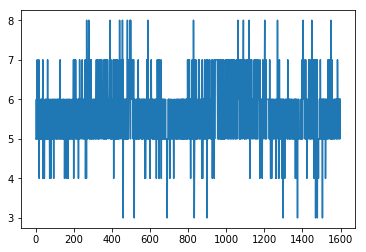

In [90]:
matrix = np.asmatrix(rw[['quality']])
np.array(matrix[:,0])
plt.plot(np.array(matrix[:,0]))

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


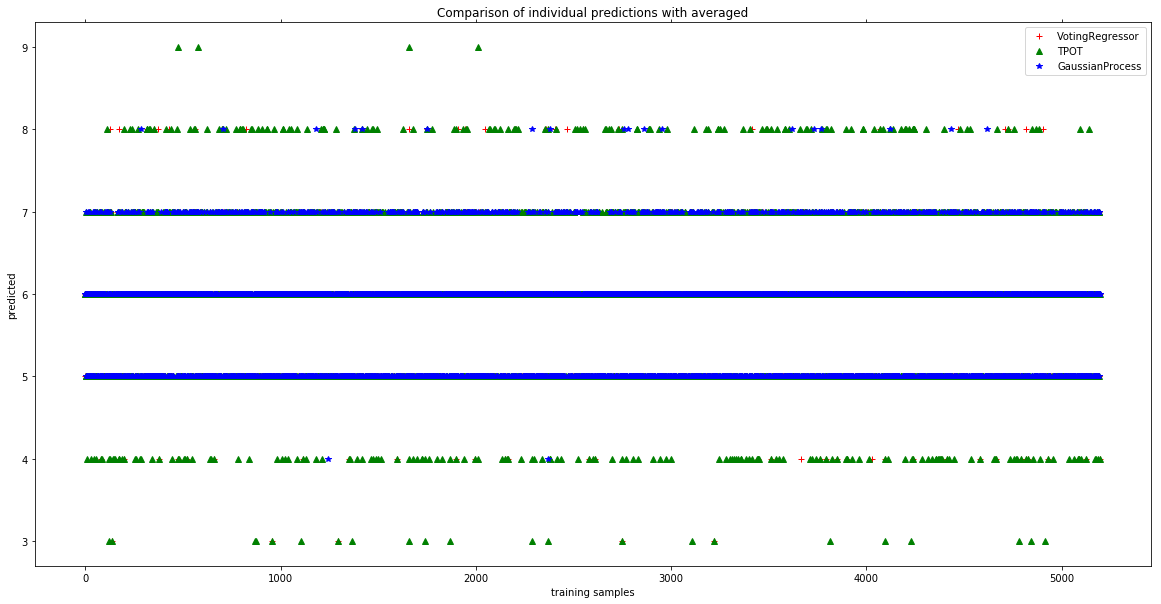

In [75]:
plt.figure(figsize=(20, 10))
plt.plot(eclf.predict(xt), 'r+', label='VotingRegressor')
plt.plot(tpot.predict(xt), 'g^', label='TPOT')
plt.plot(gpc.predict(xt), 'b*', label='GaussianProcess')

plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(data[column_names], data[label_names])

NameError: name 'data' is not defined

In [77]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.307692          0.186275     0.216867        0.308282   0.106825   
1          0.240385          0.215686     0.204819        0.015337   0.118694   
2          0.413462          0.196078     0.240964        0.096626   0.121662   
3          0.326923          0.147059     0.192771        0.121166   0.145401   
4          0.326923          0.147059     0.192771        0.121166   0.145401   
...             ...               ...          ...             ...        ...   
1593       0.123894          0.260274     0.000000        0.034247   0.075125   
1594       0.212389          0.321918     0.000000        0.054795   0.066778   
1595       0.283186          0.280822     0.010000        0.047945   0.108514   
1596       0.283186          0.280822     0.010000        0.047945   0.108514   
1597       0.150442          0.184932     0.080000        0.054795   0.090150   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.149826              0.373550  0.267785  0.254545   
1                0.041812              0.285383  0.132832  0.527273   
2                0.097561              0.204176  0.154039  0.490909   
3                0.156794              0.410673  0.163678  0.427273   
4                0.156794              0.410673  0.163678  0.427273   
...                   ...                   ...       ...       ...   
1593             0.197183              0.070671  0.323789  0.488189   
1594             0.028169              0.007067  0.435389  0.527559   
1595             0.028169              0.045936  0.361968  0.330709   
1596             0.028169              0.045936  0.361968  0.330709   
1597             0.028169              0.049470  0.391336  0.472441   

      sulphates   alcohol  quality  
0      0.267442  0.129032        6  
1      0.313953  0.241935        6  
2      0.255814  0.338710        6  
3      0.209302  0.306452        6  
4      0.209302  0.306452        6  
...         ...       ...      ...  
1593   0.071856  0.169231        5  
1594   0.083832  0.292308        5  
1595   0.077844  0.215385        5  
1596   0.077844  0.215385        5  
1597   0.149701  0.153846        5  

[6496 rows x 12 columns]

In [78]:
X_new

array([[0.18627451, 0.26778485, 0.12903226],
       [0.21568627, 0.13283208, 0.24193548],
       [0.19607843, 0.15403894, 0.33870968],
       ...,
       [0.28082192, 0.36196769, 0.21538462],
       [0.28082192, 0.36196769, 0.21538462],
       [0.18493151, 0.39133627, 0.15384615]])

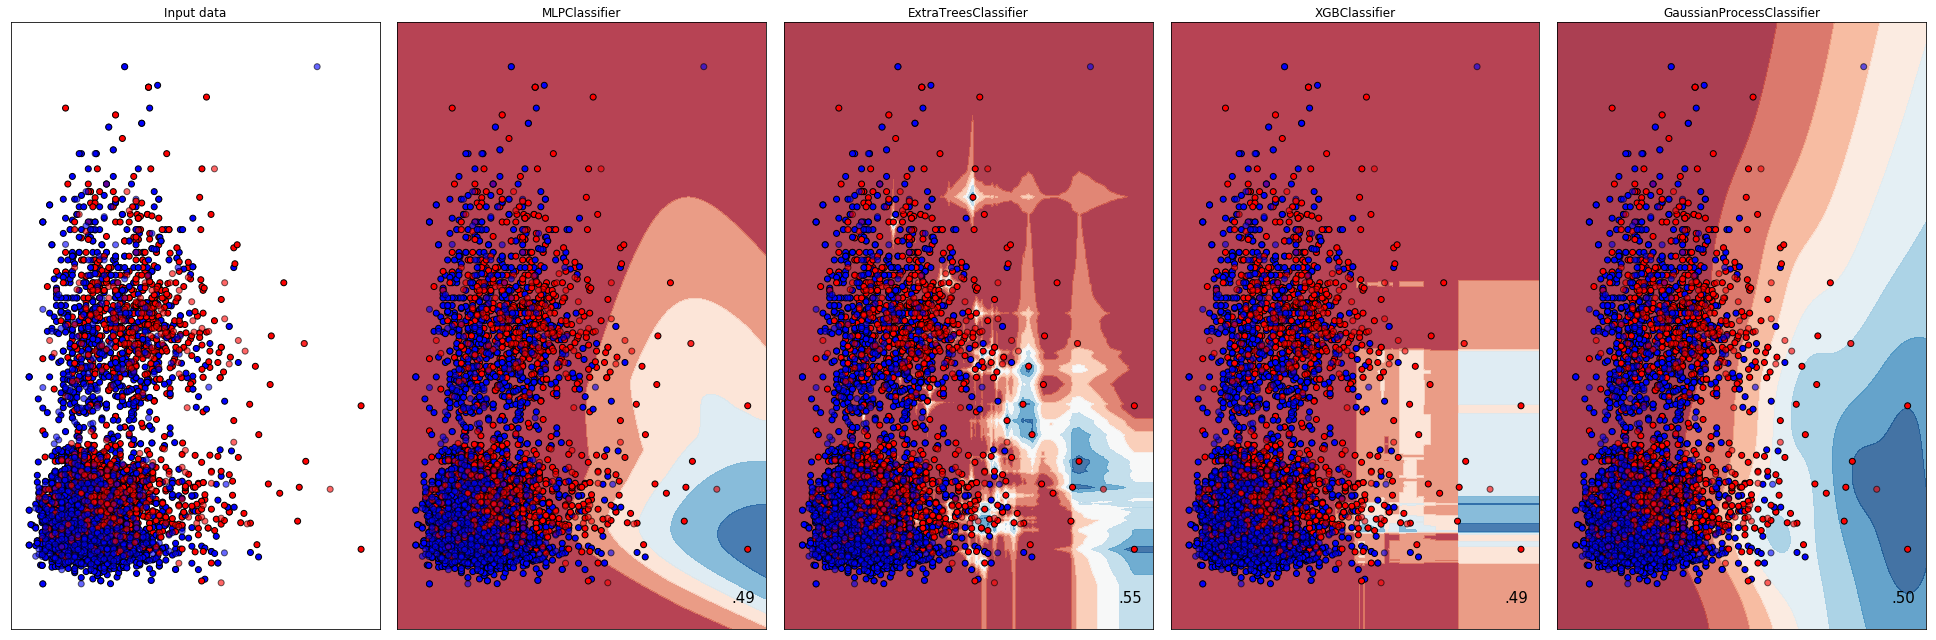

In [79]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


h = .02  # step size in the mesh

names = ["MLPClassifier", "ExtraTreesClassifier", 'XGBClassifier', 'GaussianProcessClassifier']

classifiers = [MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000),
               ExtraTreesClassifier(n_estimators=2000), XGBClassifier(),
               GaussianProcessClassifier(1.0 * RBF(1.0))]

_column_names = ['volatile acidity', 'density']

#column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
datasets = [(np.array(data[_column_names]), np.array(data[label_names]))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

#for v in range(1):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()